# Introduction to Pandas

In [1]:
import pandas as pd

In [2]:
# This is how you create a series in pandas, a 1-dimensional array
x = pd.Series([6,3,8,6])

In [3]:
x

0    6
1    3
2    8
3    6
dtype: int64

In [4]:
# The above example uses the default indices, but we can also specify it
x = pd.Series([6,3,8,6], index=["q","w","e","r"])

In [5]:
x

q    6
w    3
e    8
r    6
dtype: int64

In [6]:
x["w"]

3

In [7]:
x[["r","w"]]

r    6
w    3
dtype: int64

In [9]:
# We can also pass in a dictionary as a series, and the keys becomes the indices
age = {"Tim":29,"Jim":31,"Pam":27,"Sam":35}
y = pd.Series(age)
y

Tim    29
Jim    31
Pam    27
Sam    35
dtype: int64

In [12]:
# We can also do this with data frames, a 2d array. 
data = {"name" : ["Tim","Jim","Pam","Sam"],
        "age": [29,31,27,35],
        "zip" : ["02115","02130","67700","00100"]}
z = pd.DataFrame(data, columns=["name","age","zip"])
z

,name,age,zip
0,Tim,29,02115
1,Jim,31,02130
2,Pam,27,67700
3,Sam,35,00100


In [14]:
z["name"]

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

In [15]:
z.name

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

In [21]:
# We can change the index of an object.
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
# We then create a new list, which consists of the previous index, but sorted. 
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

In [23]:
# we can add data frames, but if the indices do not match, then it will produce a NaN
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
y = pd.Series([7,3,5,2], index=["e","q","r","t"])
print(x)
print(y)
print(x+y)

q    6
w    3
e    8
r    6
dtype: int64
e    7
q    3
r    5
t    2
dtype: int64
e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64


# Importing and Inspecting Data

In [24]:
import numpy as np
import pandas as pd

In [52]:
# First we load in the data on whiskies (note that a .txt can be loaded as a csv)
whisky = pd.read_csv("whiskies.txt")
# Then we take the regions file, and load it into the whiskies dataframe as a new column
whisky["Region"] = pd.read_csv("regions.txt")
# We then examine the data, and it appears to be loaded correctly
whisky.head()
whisky.tail()
# The iloc method can index a data frame by location
# This reads the rows from 0 to 10, which works in the same way as string slicing:
whisky.iloc[0:10]
# This reads the the rows from 5:10, and the columns from 0:5.
whisky.iloc[5:10,0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [53]:
# This lists all of the column names, and we can use this to target the columns about flavors.
print(whisky.columns)
flavors = whisky.iloc[:,2:14]
flavors

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


# Exploring Correlations

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


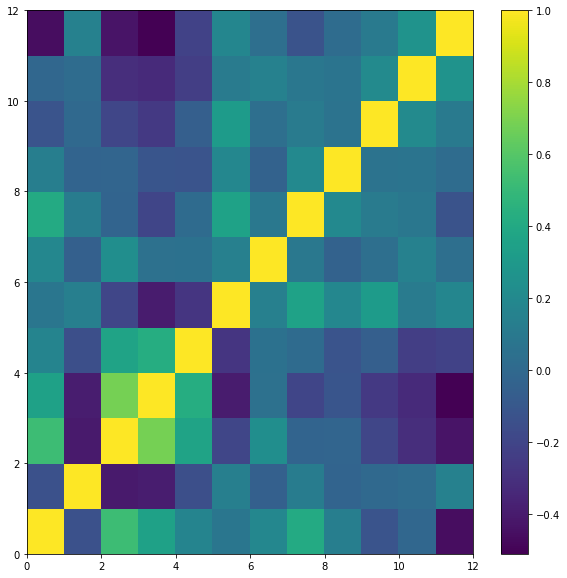

In [54]:
# We first create an object which has all the correlations between flavors
corr_flavors = pd.DataFrame.corr(flavors)
# Then we import matplotlib, and use this to plot it
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")
corr_flavors

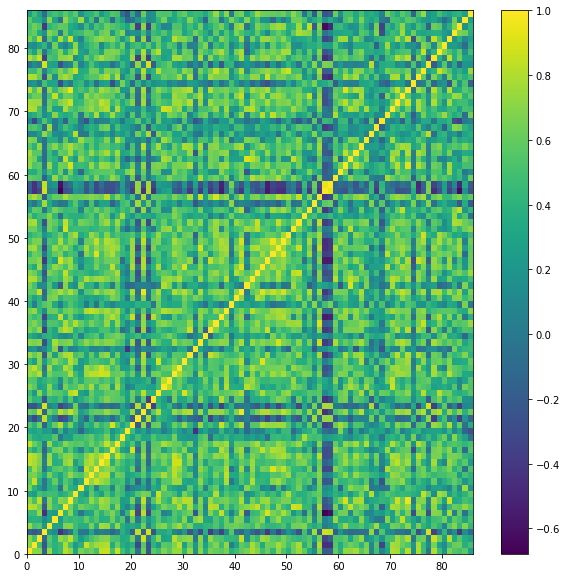

In [55]:
# Next we will look at the correlation among whiskies across flavors
# To do this, we will need to transpose the data
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize = (10,10))
plt.pcolor(corr_whisky)
# We add this to avoid blank space in the rows
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.pdf")

# Clustering Whiskies by Flavor Profile

In [56]:
# We want to perform spectral co-clustering, which puts objects (in this case whiskies) into groups based on
# how often another thing (in this case flavors) occurs within it. 
# To do this, we first need to manipulate the dataset using an adjacency matrix, where the rows correspond to
# flavors and the columns correspond to whiskys.
# Since the whiskys come from 6 regions, we will ask for 6 clusters.

In [57]:
from sklearn.cluster import SpectralCoclustering

In [58]:
model = SpectralCoclustering(n_clusters=6,random_state=0)
model.fit(corr_whisky)
# The output is grouped by cluster and each entry is a row in the correlation matrix.
# The true/false denotes whether a row belongs to a given cluster or not, so a sum tells us how many are in each cluster.
print(np.sum(model.rows_, axis=1))
# We also need to check that each whisky only appears once in a cluster.
print(np.sum(model.rows_,axis=0))
model.row_labels_

[ 5 20 19  6 19 17]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1])

# Comparing Correlation Matrices

In [60]:
# We want to draw the clusters as groups, and rename the indices to match the new sorting.
# We first add a new row, which consists of the numeric cluster names we created in the model.
whisky["Group"] = pd.Series(model.row_labels_,index=whisky.index)
# We then sort the dataset by this new column.
whisky = whisky.iloc[np.argsort(model.row_labels_)]
# Then we reset the index of the dataframe
whisky = whisky.reset_index(drop=True)

In [63]:
# We now want to recalculate the correlation matrix
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
# This returns a dataframe, but we want a numpy array
correlations = np.array(correlations)

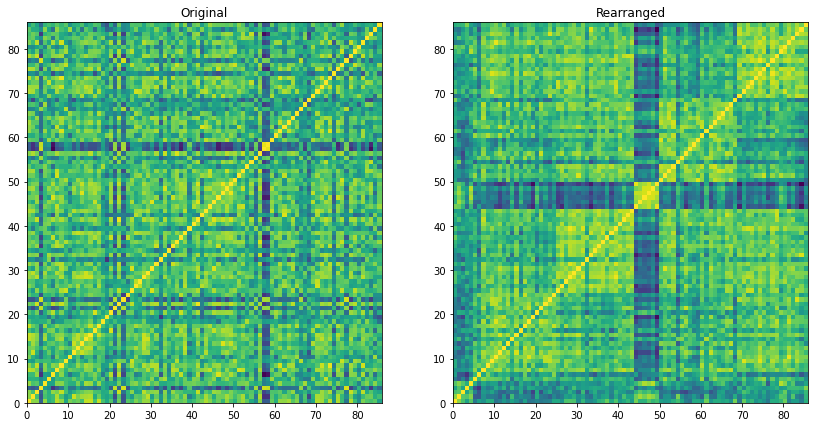

In [64]:
# We can now compare this new, clustered correlation matrix with the original one.
plt.figure(figsize= (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.savefig("comparisons.pdf")

In [ ]:
# In the new matrix, the 6 clusters are visible on the diagonal line
# We would therefore expect whiskies which occur in the same cluster to be similar in terms of
# smokiness, honey flavor, and so on. 